In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Data collection and processing

In [12]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv("./dataset/calories/calories.csv")

In [13]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [16]:
exercise_data = pd.read_csv("./dataset/calories/exercise.csv")

In [17]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining the two dataframe

In [19]:
calories_dataset = pd.concat([exercise_data, calories["Calories"]], axis=1)

In [20]:
calories_dataset.shape

(15000, 9)

In [21]:
calories_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [22]:
calories_dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [23]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data analysis

In [26]:
# Get the statistical measures of the data
calories_dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [27]:
sns.set()

In [29]:
calories_dataset.Gender.value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Gender', ylabel='count'>

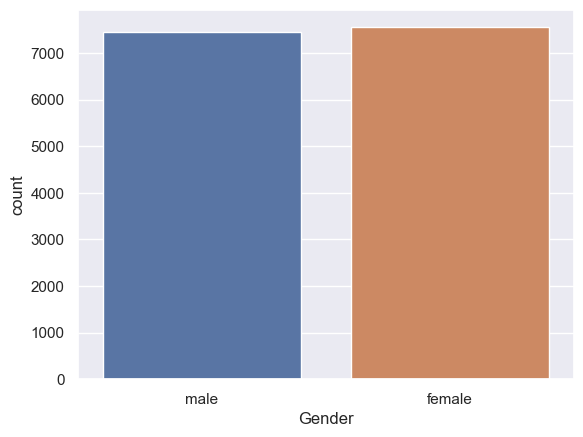

In [28]:
sns.countplot(data=calories_dataset, x="Gender")

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

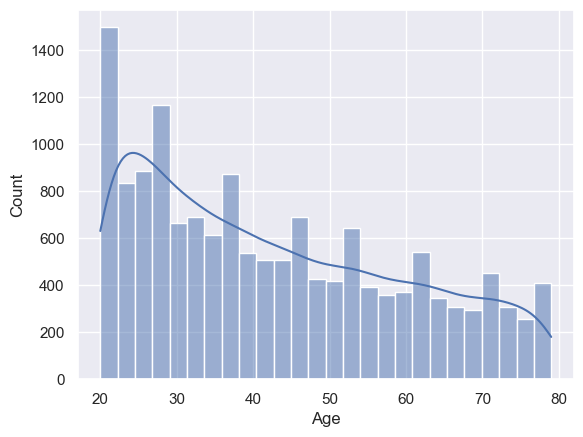

In [31]:
sns.histplot(calories_dataset, x="Age", kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

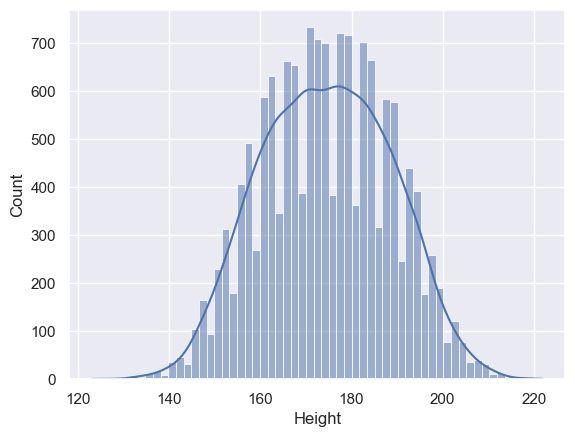

In [32]:
sns.histplot(calories_dataset, x="Height", kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

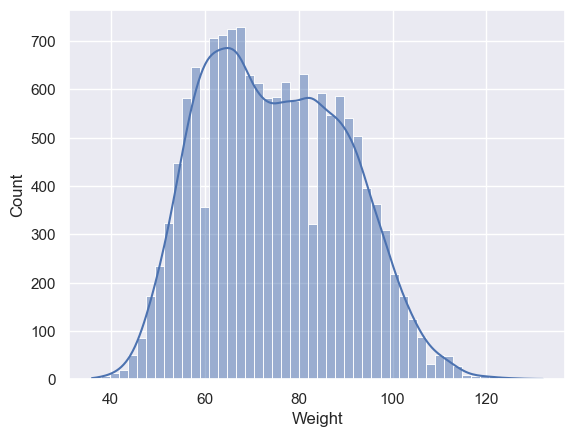

In [33]:
sns.histplot(calories_dataset, x="Weight", kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Heart_Rate', ylabel='Count'>

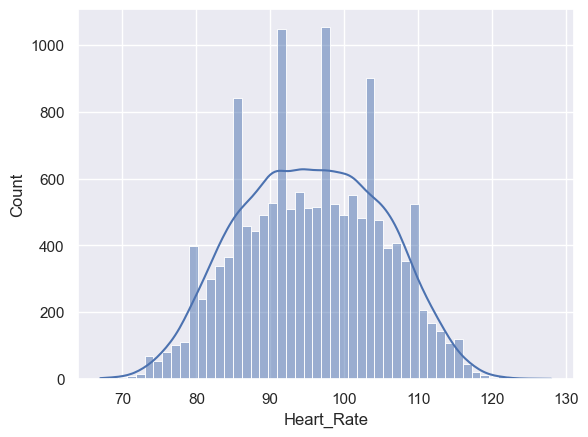

In [35]:
sns.histplot(calories_dataset, x="Heart_Rate", kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Body_Temp', ylabel='Count'>

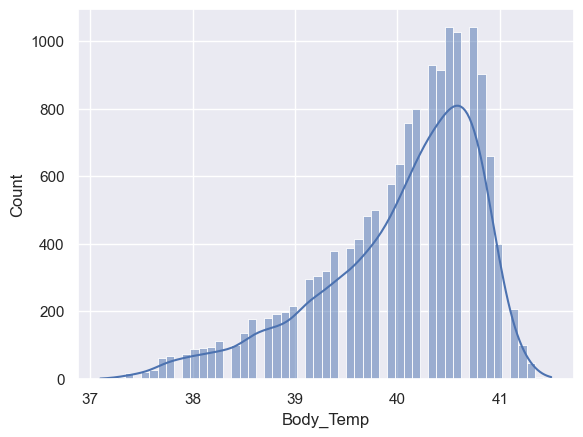

In [36]:
sns.histplot(calories_dataset, x="Body_Temp", kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Duration', ylabel='Count'>

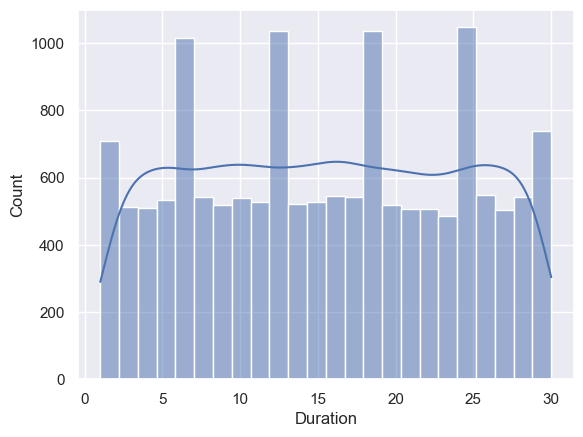

In [37]:
sns.histplot(calories_dataset, x="Duration", kde=True)

## Finding the correlation in the dataset

In [40]:
correlation = calories_dataset.corr(numeric_only=True)

# Positive correlation
# Negative Correlation

<Axes: >

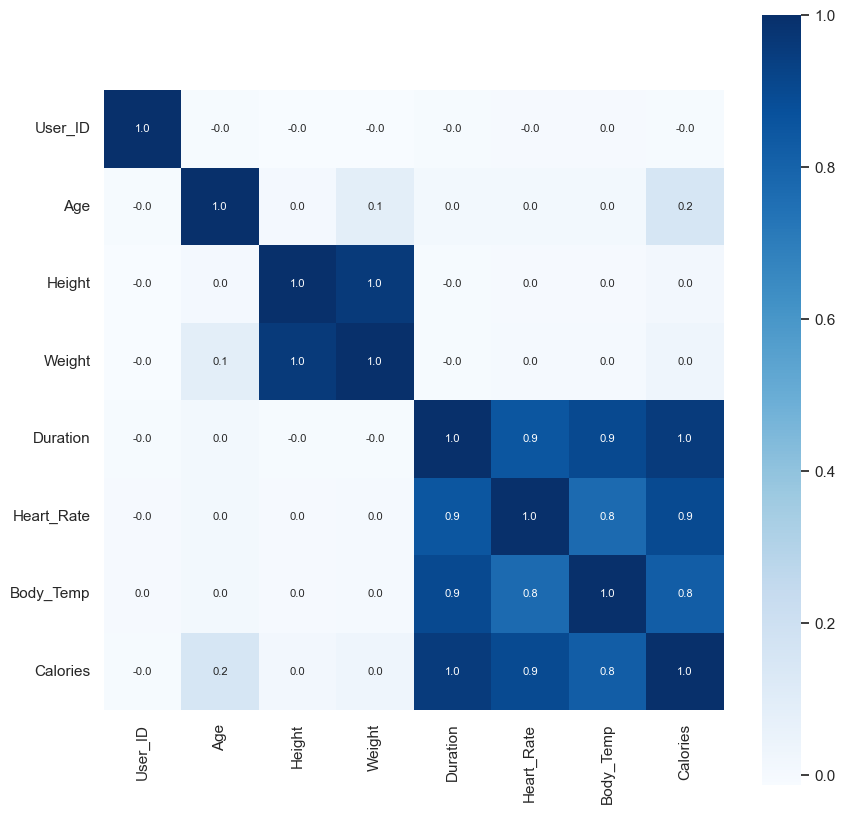

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

## Converting the text data to numerical values

In [48]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [50]:
calories_dataset.replace({"Gender": {"male": 0, "female": 1}}, inplace=True)

## Splitting features and target

In [56]:
X = calories_dataset.drop(columns=["User_ID", "Calories"])
y = calories_dataset.Calories

## Training testing and splitting

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
X.shape, X_train.shape, X_test.shape

((15000, 7), (12000, 7), (3000, 7))

## Model Training

In [58]:
regressor = XGBRegressor()

In [59]:
regressor.fit(X_train, y_train)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:359

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [61]:
# train data
y_train_predict = regressor.predict(X_train)
error_score = metrics.r2_score(y_train, y_train_predict)
print(f"Error score(MSE): {error_score}")

Error score(MSE): 0.9995691477017405


/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:359

In [62]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1154,1,38,169.0,67.0,3.0,85.0,38.5
9804,0,30,194.0,96.0,9.0,91.0,39.6
7919,1,78,182.0,79.0,7.0,84.0,39.4
4854,0,50,171.0,77.0,29.0,111.0,40.8
5947,1,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...
11798,1,49,178.0,71.0,12.0,98.0,39.9
13896,1,67,159.0,58.0,23.0,101.0,40.4
6637,1,25,167.0,64.0,20.0,100.0,40.4
2575,1,36,167.0,64.0,28.0,108.0,40.8


In [63]:
# train data
y_test_predict = regressor.predict(X_test)
error_score = metrics.r2_score(y_test, y_test_predict)
print(f"Error score(MSE): {error_score}")

Error score(MSE): 0.998800624504713


/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/xgboost/data.py:359

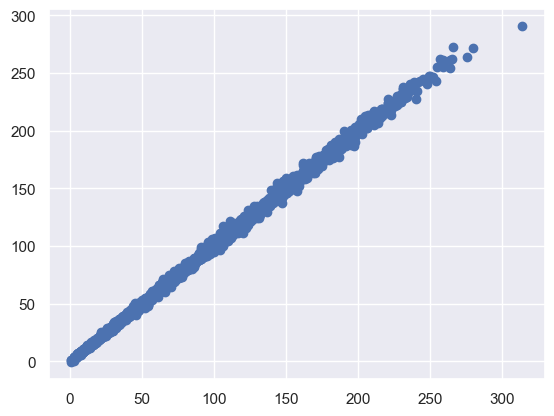

In [64]:
plt.scatter(y_test, y_test_predict)

In [70]:
for (a,b) in zip(y_test, y_test_predict):
    print(a, "<--->", b)

127.0 <---> 125.58828
224.0 <---> 222.11377
38.0 <---> 38.725952
6.0 <---> 5.840023
137.0 <---> 137.43477
27.0 <---> 28.083532
60.0 <---> 60.093395
58.0 <---> 57.464157
108.0 <---> 106.005455
31.0 <---> 29.481611
92.0 <---> 95.470764
115.0 <---> 116.30296
119.0 <---> 115.34098
8.0 <---> 8.663313
91.0 <---> 92.133064
48.0 <---> 48.019775
23.0 <---> 22.673063
119.0 <---> 123.36914
30.0 <---> 30.470665
92.0 <---> 90.5019
22.0 <---> 23.936867
4.0 <---> 3.638723
68.0 <---> 70.17786
163.0 <---> 163.10207
54.0 <---> 49.061028
207.0 <---> 210.35963
39.0 <---> 40.01569
123.0 <---> 120.84328
66.0 <---> 60.01674
34.0 <---> 32.966305
21.0 <---> 20.020025
154.0 <---> 152.05824
25.0 <---> 25.075436
15.0 <---> 15.074868
120.0 <---> 119.39863
119.0 <---> 120.532974
126.0 <---> 122.43925
225.0 <---> 224.02138
25.0 <---> 24.7549
143.0 <---> 139.25456
99.0 <---> 95.81172
181.0 <---> 182.38194
148.0 <---> 156.48619
194.0 <---> 193.94238
63.0 <---> 62.839226
67.0 <---> 66.07577
55.0 <---> 55.96635
192.0 <-

In [71]:
mae = metrics.mean_absolute_error(y_test, y_test_predict)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.4833678883314132
